Stanford Cars Data Splits
Stanford Cars training split comprises 8144 images.
Stanford Cars testing split comprises 8041 images.

In [9]:
from datasets import load_dataset

dataset = load_dataset("tanganke/stanford_cars")

README.md:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

test-00000-of-00002.parquet:   0%|          | 0.00/513M [00:00<?, ?B/s]

test-00001-of-00002.parquet:   0%|          | 0.00/474M [00:00<?, ?B/s]

contrast-00000-of-00001.parquet:   0%|          | 0.00/347M [00:00<?, ?B/s]

gaussian_noise-00000-of-00002.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

gaussian_noise-00001-of-00002.parquet:   0%|          | 0.00/450M [00:00<?, ?B/s]

impulse_noise-00000-of-00002.parquet:   0%|          | 0.00/543M [00:00<?, ?B/s]

impulse_noise-00001-of-00002.parquet:   0%|          | 0.00/513M [00:00<?, ?B/s]

jpeg_compression-00000-of-00001.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

motion_blur-00000-of-00001.parquet:   0%|          | 0.00/435M [00:00<?, ?B/s]

pixelate-00000-of-00001.parquet:   0%|          | 0.00/3.74M [00:00<?, ?B/s]

spatter-00000-of-00002.parquet:   0%|          | 0.00/417M [00:00<?, ?B/s]

spatter-00001-of-00002.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8144 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8041 [00:00<?, ? examples/s]

Generating contrast split:   0%|          | 0/8041 [00:00<?, ? examples/s]

Generating gaussian_noise split:   0%|          | 0/8041 [00:00<?, ? examples/s]

Generating impulse_noise split:   0%|          | 0/8041 [00:00<?, ? examples/s]

Generating jpeg_compression split:   0%|          | 0/8041 [00:00<?, ? examples/s]

Generating motion_blur split:   0%|          | 0/8041 [00:00<?, ? examples/s]

Generating pixelate split:   0%|          | 0/8041 [00:00<?, ? examples/s]

Generating spatter split:   0%|          | 0/8041 [00:00<?, ? examples/s]

In [ ]:
# Display the dataset's structure
print(dataset)

# Access the training set
train_set = dataset["train"]
test_set = dataset["test"]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 8144
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 8041
    })
    contrast: Dataset({
        features: ['image', 'label'],
        num_rows: 8041
    })
    gaussian_noise: Dataset({
        features: ['image', 'label'],
        num_rows: 8041
    })
    impulse_noise: Dataset({
        features: ['image', 'label'],
        num_rows: 8041
    })
    jpeg_compression: Dataset({
        features: ['image', 'label'],
        num_rows: 8041
    })
    motion_blur: Dataset({
        features: ['image', 'label'],
        num_rows: 8041
    })
    pixelate: Dataset({
        features: ['image', 'label'],
        num_rows: 8041
    })
    spatter: Dataset({
        features: ['image', 'label'],
        num_rows: 8041
    })
})


The reason the first 10 cars have the same label but are not the same car is because the label 0 corresponds to the first label in the list of labels, which is 'AM General Hummer SUV 2000'. The dataset likely contains multiple images of the same car model, but they are different images of the same type of car.

In [36]:
# Extract the labels as a list
labels = train_set.features["label"].names
labels = list(labels)

for i in range(10):
    print(labels[i])

AM General Hummer SUV 2000
Acura RL Sedan 2012
Acura TL Sedan 2012
Acura TL Type-S 2008
Acura TSX Sedan 2012
Acura Integra Type R 2001
Acura ZDX Hatchback 2012
Aston Martin V8 Vantage Convertible 2012
Aston Martin V8 Vantage Coupe 2012
Aston Martin Virage Convertible 2012


In [33]:
# Extract the labels as a list
labels = train_set.features["label"].names
labels = list(labels)

# Print the range of labels
print(f"Labels range from 0 to {len(labels) - 1}")
print("Labels:", labels)

Labels range from 0 to 195
Labels: ['AM General Hummer SUV 2000', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura Integra Type R 2001', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012', 'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007', 'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 

In [45]:
from collections import Counter

# Count the number of images per label
label_counts = Counter(train_set['label'])

# Extract the labels as a list
labels = train_set.features["label"].names

# Print the label counts with label names
for label_index, count in label_counts.items():
    print(f"{labels[label_index]}: {count} images")

AM General Hummer SUV 2000: 45 images
Acura RL Sedan 2012: 32 images
Aston Martin Virage Coupe 2012: 38 images
Ferrari FF Coupe 2012: 42 images
Ferrari California Convertible 2012: 39 images
Ferrari 458 Italia Convertible 2012: 40 images
Ferrari 458 Italia Coupe 2012: 43 images
Fisker Karma Sedan 2012: 44 images
Ford F-450 Super Duty Crew Cab 2012: 42 images
Ford Mustang Convertible 2007: 45 images
Ford Freestar Minivan 2007: 44 images
Ford Expedition EL SUV 2009: 45 images
Ford Edge SUV 2012: 43 images
Audi RS 4 Convertible 2008: 37 images
Ford Ranger SuperCab 2011: 42 images
Ford GT Coupe 2006: 46 images
Ford F-150 Regular Cab 2012: 43 images
Ford F-150 Regular Cab 2007: 45 images
Ford Focus Sedan 2007: 45 images
Ford E-Series Wagon Van 2012: 38 images
Ford Fiesta Sedan 2012: 43 images
GMC Terrain SUV 2012: 42 images
GMC Savana Van 2012: 68 images
GMC Yukon Hybrid SUV 2012: 43 images
Audi A5 Coupe 2012: 41 images
GMC Acadia SUV 2012: 45 images
GMC Canyon Extended Cab 2012: 40 images


In [47]:
# Print the label counts with label names for the first 10 labels
for label_index, count in label_counts.most_common(10):
    print(f"{labels[label_index]}: {count} images")

GMC Savana Van 2012: 68 images
Chrysler 300 SRT-8 2010: 49 images
Mercedes-Benz 300-Class Convertible 1993: 48 images
Mitsubishi Lancer Sedan 2012: 48 images
Jaguar XK XKR 2012: 47 images
Chevrolet Corvette ZR1 2012: 47 images
Ford GT Coupe 2006: 46 images
Mercedes-Benz C-Class Sedan 2012: 46 images
Nissan 240SX Coupe 1998: 46 images
Suzuki Kizashi Sedan 2012: 46 images


In [52]:
# View the first example in the training set
first_example = train_set[12]
print(first_example)

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x235 at 0x2A6D13530>, 'label': 0}


In [ ]:
# We can use them in matplotlib directly becase they are PIL images
# JpegImageFile is a subclass of PIL.Image.Image

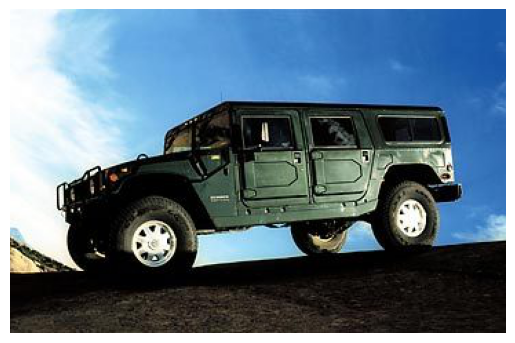

In [53]:
import matplotlib.pyplot as plt

# Function to display an image
def show_image(example):
    image = example['image']  # Directly use the image object
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Display the first image in the training set
show_image(first_example)